In [ ]:
import pandas as pd

# Load the dataset (replace with actual file path or URL)
df = pd.read_csv("NLP_Dataset_Extended.csv")

# Display dataset information
print("Dataset Information:")
print(df.info())

# Display the first few rows
display(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Ensure the dataset contains text and target labels (for classification tasks)
if 'Input' in df.columns and 'Prediction' in df.columns:
    print("\nDataset contains necessary text and target labels.")
else:
    print("\nWarning: Check column names. Expected 'Input' for text data and 'Prediction' for labels.")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Input       2000 non-null   object
 1   Prediction  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


,Input,Prediction
0,Patient is a 62-year-old female with total cho...,low-risk
1,Patient is a 52-year-old male with total chole...,high-risk
2,Patient is a 32-year-old male with total chole...,high-risk
3,Patient is a 40-year-old female with total cho...,high-risk
4,Patient is a 66-year-old female with total cho...,high-risk



Missing Values:
Input         0
Prediction    0
dtype: int64

Dataset contains necessary text and target labels.



Summary Statistics:
                                                    Input Prediction
count                                                2000       2000
unique                                               2000          2
top     Patient is a 60-year-old female with total cho...   low-risk
freq                                                    1       1000

Missing Values:
Input         0
Prediction    0
dtype: int64

After handling missing values:
Input         0
Prediction    0
dtype: int64


<ipython-input-3-f8003766f39a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prediction', data=df, palette='viridis')


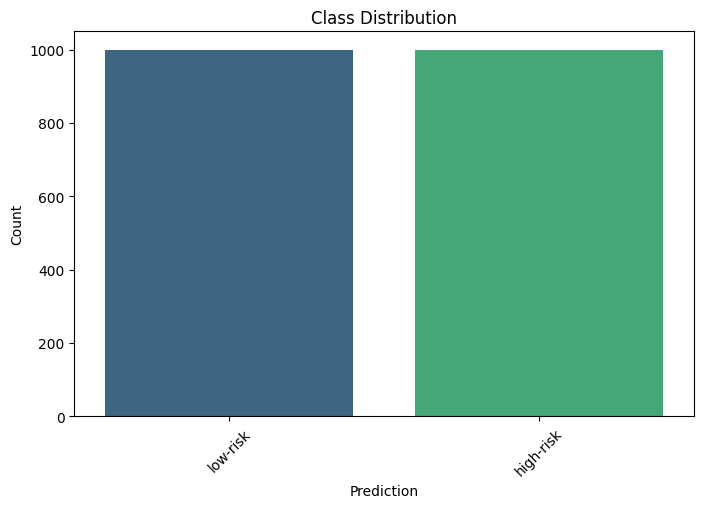

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Perform basic EDA
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values (drop or fill based on context)
df.dropna(inplace=True)  # Dropping rows with missing values
print("\nAfter handling missing values:")
print(df.isnull().sum())

# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Prediction', data=df, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply text cleaning to the dataset
df['cleaned_text'] = df['Input'].apply(clean_text)

# Display cleaned text
df[['Input', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Input,cleaned_text
0,"""Patient is a 55-year-old male with total chol...",patient yearold male total cholesterol mgdl hd...
1,"""Patient is a 22-year-old male with total chol...",patient yearold male total cholesterol mgdl hd...
2,"""Patient is a 61-year-old female with total ch...",patient yearold female total cholesterol mgdl ...
3,"""Patient is a 35-year-old female with total ch...",patient yearold female total cholesterol mgdl ...
4,"""Patient is a 54-year-old female with total ch...",patient yearold female total cholesterol mgdl ...


In [ ]:
# Student Code: Generate NLP-based features
import numpy as np

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)
    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    # Hashtag count (for datasets like tweets)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))

    return df

# Generate NLP features
df = generate_nlp_features(df)
df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head()

,char_count,word_count,avg_word_length,stopword_count,htag_count
0,159,22,6.272727,0,0
1,179,25,6.200000,0,0
2,175,24,6.333333,0,0
3,192,26,6.423077,0,0
4,182,24,6.625000,0,0


In [ ]:
!pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313501 sha256=fd1c2241136a4e20842fc3d6944a0a2a6c346beda705f6740973962ca05c08d3
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz

--2025-03-23 17:25:06--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.33, 3.171.22.68, 3.171.22.118, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   141MB/s    in 24s     

2025-03-23 17:25:31 (177 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
# Student Code: Generate Bag of Words, TFIDF, and FastText features

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])
print("BoW Shape:", X_bow.shape)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])
print("TF-IDF Shape:", X_tfidf.shape)

# Load FastText model
ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words if word in ft_model.words]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(300)  # Return a zero vector if no words are found

# Generate FastText embeddings
df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)
print("FastText Embeddings Shape:", df['fasttext_embeddings'].apply(lambda x: len(x)).unique())

BoW Shape: (2000, 61)
TF-IDF Shape: (2000, 61)
FastText Embeddings Shape: [300]


In [ ]:
# Student Code: Train Models on NLP Features (char_count, word_count, etc.)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the validation function
def validate_model(model, X_train, X_val, y_train, y_val):
    """
    Validate the model on a validation set and return performance metrics.

    Parameters:
    - model: Trained model
    - X_train: Training features
    - X_val: Validation features
    - y_train: Training labels
    - y_val: Validation labels

    Returns:
    - val_accuracy: Accuracy on validation set
    - val_report: Classification report for validation set
    """
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val)

    # Calculate accuracy and classification report
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_report = classification_report(y_val, y_val_pred)

    return val_accuracy, val_report

# Prepare data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Prediction']

# First split: Train + Validation, Test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train, Validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)  # 0.2 of temp is validation, so 16% of original is validation

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Train and validate each model
for name, model in models.items():
    print(f"\n{name} Validation and Test Performance:")

    # Validate the model
    val_accuracy, val_report = validate_model(model, X_train, X_val, y_train, y_val)
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print("Validation Classification Report:\n", val_report)

    # Train on full training set and evaluate on test set
    model.fit(X_train, y_train)  # Re-train on full training set
    y_test_pred = model.predict(X_test)

    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Random Forest Validation and Test Performance:
Validation Accuracy: 0.7531
Validation Classification Report:
               precision    recall  f1-score   support

   high-risk       0.80      0.91      0.85       247
    low-risk       0.42      0.22      0.29        73

    accuracy                           0.75       320
   macro avg       0.61      0.57      0.57       320
weighted avg       0.71      0.75      0.72       320

Test Accuracy: 0.8100
Test Classification Report:
               precision    recall  f1-score   support

   high-risk       0.83      0.96      0.89       314
    low-risk       0.64      0.27      0.38        86

    accuracy                           0.81       400
   macro avg       0.73      0.61      0.63       400
weighted avg       0.79      0.81      0.78       400


SVM Validation and Test Performance:
Validation Accuracy: 0.7719
Validation Classification Report:
               precision    recall  f1-score   support

   high-risk       0.77     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# Train models on Bag of Words (BoW), TFIDF, and FastText features
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Function to train and evaluate models
def train_and_evaluate(X, y, feature_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"\n{name} Performance on {feature_name}:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(classification_report(y_test, y_pred))

# Train and evaluate on Bag of Words
train_and_evaluate(X_bow, y, "Bag of Words")

# Train and evaluate on TFIDF
train_and_evaluate(X_tfidf, y, "TFIDF")

# Convert FastText embeddings to a proper NumPy array and train
X_fasttext = np.vstack(df['fasttext_embeddings'])
train_and_evaluate(X_fasttext, y, "FastText Embeddings")



Random Forest Performance on Bag of Words:
Accuracy: 0.9025
              precision    recall  f1-score   support

   high-risk       0.93      0.95      0.94       314
    low-risk       0.79      0.74      0.77        86

    accuracy                           0.90       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.90      0.90      0.90       400


SVM Performance on Bag of Words:
Accuracy: 0.8525
              precision    recall  f1-score   support

   high-risk       0.87      0.96      0.91       314
    low-risk       0.76      0.45      0.57        86

    accuracy                           0.85       400
   macro avg       0.82      0.71      0.74       400
weighted avg       0.84      0.85      0.84       400


Logistic Regression Performance on Bag of Words:
Accuracy: 0.8525
              precision    recall  f1-score   support

   high-risk       0.89      0.93      0.91       314
    low-risk       0.70      0.56      0.62        86

   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Performance on FastText Embeddings:
Accuracy: 0.7850
              precision    recall  f1-score   support

   high-risk       0.79      1.00      0.88       314
    low-risk       0.00      0.00      0.00        86

    accuracy                           0.79       400
   macro avg       0.39      0.50      0.44       400
weighted avg       0.62      0.79      0.69       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Student Code: Train Models on Combined Features (NLP + TFIDF)
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the validation function
def validate_model(model, X_train, X_val, y_train, y_val):
    """
    Validate the model on a validation set and return performance metrics.

    Parameters:
    - model: Trained model
    - X_train: Training features
    - X_val: Validation features
    - y_train: Training labels
    - y_val: Validation labels

    Returns:
    - val_accuracy: Accuracy on validation set
    - val_report: Classification report for validation set
    """
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val)

    # Calculate accuracy and classification report
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_report = classification_report(y_val, y_val_pred)

    return val_accuracy, val_report

# Combine NLP-based features with TFIDF features
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]  # Define X explicitly
X_combined = hstack([X, X_tfidf])

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Ensure y is correctly defined
y = df['Prediction']  # Reset y to the original target variable with 2000 samples

# Debugging: Check sample sizes
print(f"Feature matrix (Combined Features) samples: {X_combined.shape[0]}")
print(f"Target variable samples: {len(y)}")

if X_combined.shape[0] != len(y):
    raise ValueError(f"Sample mismatch: X_combined has {X_combined.shape[0]} samples, y has {len(y)} samples")

# First split: Train + Validation, Test
X_temp, X_test, y_temp, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Second split: Train, Validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)  # 0.2 of temp is validation, so 16% of original is validation

# Train and validate each model
for name, model in models.items():
    print(f"\n{name} Performance on Combined Features:")

    # Validate the model
    val_accuracy, val_report = validate_model(model, X_train, X_val, y_train, y_val)
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print("Validation Classification Report:\n", val_report)

    # Train on full training set (X_temp) and evaluate on test set
    model.fit(X_temp, y_temp)  # Re-train on combined train + validation data (fixed from y_train to y_temp)
    y_test_pred = model.predict(X_test)

    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Feature matrix (Combined Features) samples: 2000
Target variable samples: 2000

Random Forest Performance on Combined Features:
Validation Accuracy: 0.9031
Validation Classification Report:
               precision    recall  f1-score   support

   high-risk       0.91      0.97      0.94       247
    low-risk       0.86      0.68      0.76        73

    accuracy                           0.90       320
   macro avg       0.89      0.83      0.85       320
weighted avg       0.90      0.90      0.90       320

Test Accuracy: 0.8925
Test Classification Report:
               precision    recall  f1-score   support

   high-risk       0.94      0.92      0.93       314
    low-risk       0.74      0.78      0.76        86

    accuracy                           0.89       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.90      0.89      0.89       400


SVM Performance on Combined Features:
Validation Accuracy: 0.7719
Validation Classification Report:
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.7850
Test Classification Report:
               precision    recall  f1-score   support

   high-risk       0.79      1.00      0.88       314
    low-risk       0.00      0.00      0.00        86

    accuracy                           0.79       400
   macro avg       0.39      0.50      0.44       400
weighted avg       0.62      0.79      0.69       400


Logistic Regression Performance on Combined Features:
Validation Accuracy: 0.8281
Validation Classification Report:
               precision    recall  f1-score   support

   high-risk       0.84      0.96      0.90       247
    low-risk       0.75      0.37      0.50        73

    accuracy                           0.83       320
   macro avg       0.79      0.67      0.70       320
weighted avg       0.82      0.83      0.80       320

Test Accuracy: 0.8475


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Classification Report:
               precision    recall  f1-score   support

   high-risk       0.87      0.94      0.91       314
    low-risk       0.70      0.50      0.59        86

    accuracy                           0.85       400
   macro avg       0.79      0.72      0.75       400
weighted avg       0.84      0.85      0.84       400



In [ ]:
import joblib
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Function to clean text (define this based on your preprocessing pipeline)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove special chars
    return text

# 🟢 Step 1: Train the Model and Save It

# Sample training data
train_texts = ["I love programming", "Python is great", "I hate bugs", "Debugging is fun"]
train_labels = [1, 1, 0, 1]  # 1 = positive, 0 = negative

# Clean the training data
train_texts_cleaned = [clean_text(text) for text in train_texts]

# Create Bag of Words (BoW) vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)  # Limiting to 5000 words for efficiency
X_train_bow = bow_vectorizer.fit_transform(train_texts_cleaned)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_bow, train_labels)

# Save the trained vectorizer and model
joblib.dump(bow_vectorizer, 'bow_vectorizer.pkl')
joblib.dump(model, 'text_classification_model.pkl')

print("✅ Model and Vectorizer saved successfully!")

# 🟢 Step 2: Load the Model & Vectorizer for Predictions

# Load the trained model and vectorizer
bow_vectorizer = joblib.load('bow_vectorizer.pkl')
loaded_model = joblib.load('text_classification_model.pkl')

# 🟢 Step 3: Predict on New Text

# New text sample
new_text = ["This is a new text sample to classify."]
new_text_cleaned = [clean_text(text) for text in new_text]  # Ensure text is cleaned

# Ensure new text aligns with the trained vocabulary
trained_vocab = bow_vectorizer.get_feature_names_out()  # Get trained vocabulary
filtered_text = [" ".join([word for word in text.split() if word in trained_vocab]) for text in new_text_cleaned]

# Transform using the same trained vectorizer
new_text_features = bow_vectorizer.transform(filtered_text)

# Verify feature count before prediction
print(f"Feature count in new_text_features: {new_text_features.shape[1]}")
print(f"Feature count expected by model: {loaded_model.n_features_in_}")

# Make prediction
prediction = loaded_model.predict(new_text_features)
print(f'🟢 Prediction for new text: {prediction}')


✅ Model and Vectorizer saved successfully!
Feature count in new_text_features: 9
Feature count expected by model: 9
🟢 Prediction for new text: [1]


In [ ]:
from scipy.sparse import hstack
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical labels to numeric (e.g., 'low-risk' -> 0, 'high-risk' -> 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts ['high-risk', 'low-risk'] to [1, 0]

# Combine NLP features and TFIDF features
X_combined = hstack([X, X_tfidf])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
print(f'Combined Features Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Combined Features Accuracy: 0.8925
Classification Report:
               precision    recall  f1-score   support

   high-risk       0.93      0.93      0.93       314
    low-risk       0.75      0.74      0.75        86

    accuracy                           0.89       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.89      0.89      0.89       400

